In [10]:
import pandas as pd
from os import listdir
import glob
from glob import iglob
import seaborn as sns

path = r'D:/Databases/moodle_test/*.csv'

df = pd.concat((pd.read_csv(f) for f in iglob(path, recursive=True)), ignore_index=True)

df.head()

df.columns

Index(['Hora', 'Nombre completo del usuario', 'Usuario afectado',
       'Contexto del evento', 'Componente', 'Nombre evento', 'Descripción',
       'Origen', 'Dirección IP'],
      dtype='object')

In [21]:
df.shape
df.quantile(.5)
df.Componente.value_counts()
pd.crosstab(df.Componente,df.Origen)

Origen,web,ws
Componente,,
Actividad del curso,2,0
Archivos enviados,58,8
Carpeta,213,57
Chat,97,11
Comentarios de la entrega,5,0
Cuestionario,359,63
Foro,2762,571
Glosario,560,134
Informe del calificador,2,0


In [16]:
# extraer fecha

df['datefull'] = pd.to_datetime(df['Hora'])

# Date
df['year']= df['datefull'].dt.year
df['month']= df['datefull'].dt.month
df['day']= df['datefull'].dt.day

# Time
df['hour']= df['datefull'].dt.hour

df.head(5)

,Hora,Nombre completo del usuario,Usuario afectado,Contexto del evento,Componente,Nombre evento,Descripción,Origen,Dirección IP,datefull,year,month,day,hour
0,29/05/2021 23:56,Prof. Raidell Avello Martínez,-,Curso: Tecnología Educativa,Registros,Informe de registros visto,The user with id '1059' viewed the log report ...,web,172.25.0.1,2021-05-29 23:56:00,2021,5,29,23
1,29/05/2021 23:55,Prof. Raidell Avello Martínez,-,Curso: Tecnología Educativa,Sistema,Curso visto,The user with id '1059' viewed the course with...,web,172.25.0.1,2021-05-29 23:55:00,2021,5,29,23
2,29/05/2021 23:53,Edward Medilahaxon Pina,-,Foro: Foro del Tema 2: El diseño instruccional...,Foro,Módulo de curso visto,The user with id '2529' viewed the 'forum' act...,web,172.25.0.1,2021-05-29 23:53:00,2021,5,29,23
3,29/05/2021 23:43,Daymi Martinez Rodriguez,-,Curso: Tecnología Educativa,Sistema,Curso visto,The user with id '1895' viewed the course with...,web,172.25.0.1,2021-05-29 23:43:00,2021,5,29,23
4,29/05/2021 23:42,Daymi Martinez Rodriguez,-,Tarea: Tarea 2,Tarea,Se ha visualizado el estado de la entrega.,The user with id '1895' has viewed the submiss...,web,172.25.0.1,2021-05-29 23:42:00,2021,5,29,23


In [15]:
df_contexto = df['Contexto del evento'].value_counts()
df_contexto.head(10)

Curso: Tecnología Educativa                                                               2973
Foro: Foro del Tema 2: El diseño instruccional de cursos en línea                         1252
Tarea: Tarea 1: Introducción a la Educación en Línea                                       948
Foro: Foro del tema 1: Introducción a la Educación en Línea                                898
Glosario: Glosario del curso                                                               704
Foro: Foro de novedades, anuncios y dudas                                                  685
Tarea: Tarea 2                                                                             490
Cuestionario: Cuestionario de autoevaluación sobre diseño didáctico de cursos en línea     438
Foro: Presentación de los participantes                                                    395
Libro: El diseño instruccional de cursos en línea (Libro digital)                          258
Name: Contexto del evento, dtype: int64

<AxesSubplot:>

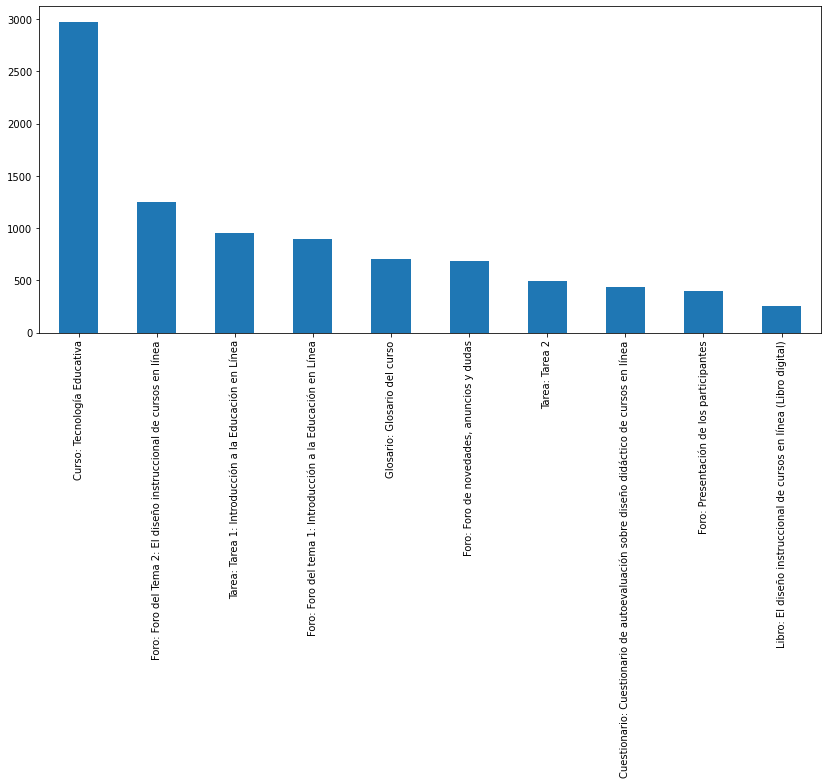

In [18]:
df_contexto.head(10).plot(kind='bar', figsize=(14,6))

In [11]:
df_usuario = df.groupby('Nombre completo del usuario')['Nombre completo del usuario'].count()

df_new = pd.DataFrame(df_usuario)
df_new.columns


Index(['Nombre completo del usuario'], dtype='object')

<AxesSubplot:xlabel='Nombre completo del usuario'>

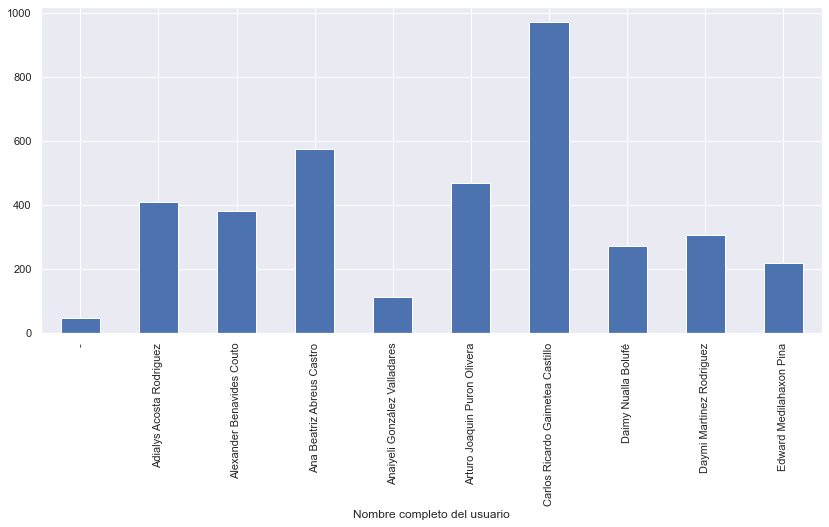

In [12]:
import seaborn as sns; sns.set(style='darkgrid')
df_usuario.head(10).plot(kind='bar', figsize=(14,6), xlabel='Nombre completo del usuario')

In [13]:

dd = df.groupby(df.Origen)
dd.count()


,Hora,Nombre completo del usuario,Usuario afectado,Contexto del evento,Componente,Nombre evento,Descripción,Dirección IP
Origen,,,,,,,,
web,9099,9099,9099,9099,9099,9099,9099,9099
ws,1331,1331,1331,1331,1331,1331,1331,1331


In [27]:
dd.mean()

,year,month,day,hour
Origen,,,,
web,2021.0,5.671063,17.767777,13.345423
ws,2021.0,5.760331,18.143501,17.317055
